## 117. Populating Next Right Pointers in Each Node II

<div class="elfjS" data-track-load="description_content"><p>Given a binary tree</p>

<pre>struct Node {
  int val;
  Node *left;
  Node *right;
  Node *next;
}
</pre>

<p>Populate each next pointer to point to its next right node. If there is no next right node, the next pointer should be set to <code>NULL</code>.</p>

<p>Initially, all next pointers are set to <code>NULL</code>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2019/02/15/117_sample.png" style="width: 500px; height: 171px;">
<pre><strong>Input:</strong> root = [1,2,3,4,5,null,7]
<strong>Output:</strong> [1,#,2,3,#,4,5,7,#]
<strong>Explanation: </strong>Given the above binary tree (Figure A), your function should populate each next pointer to point to its next right node, just like in Figure B. The serialized output is in level order as connected by the next pointers, with '#' signifying the end of each level.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre><strong>Input:</strong> root = []
<strong>Output:</strong> []
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[0, 6000]</code>.</li>
	<li><code>-100 &lt;= Node.val &lt;= 100</code></li>
</ul>

<p>&nbsp;</p>
<p><strong>Follow-up:</strong></p>

<ul>
	<li>You may only use constant extra space.</li>
	<li>The recursive approach is fine. You may assume implicit stack space does not count as extra space for this problem.</li>
</ul>
</div>

In [1]:
import numpy as np
from typing import List, Optional
%load_ext memory_magics
        
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next

In [2]:
from graphviz import Digraph
from collections import deque 

def build_tree(values):
    if not values:
        return None
    iter_values = iter(values)
    root = Node(next(iter_values))
    root.next=None
    queue = deque([root])
    while queue:
        node = queue.popleft()
        try:
            left_val = next(iter_values)
            if left_val is not None:
                node.left = Node(left_val)
                queue.append(node.left)
            right_val = next(iter_values)
            if right_val is not None:
                node.right =Node(right_val)
                queue.append(node.right)
            node.next=None
        except StopIteration:
            break
    return root 

def plot_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        graph.attr(size='8,8')
    if node is not None:
        graph.node(str(node_id), str(node.val))
        if node.left:
            graph.edge(str(node_id), str(2 * node_id + 1))
            plot_tree(node.left, graph, 2 * node_id + 1)
        if node.right:
            graph.edge(str(node_id), str(2 * node_id + 2))
            plot_tree(node.right, graph, 2 * node_id + 2)
    return graph

def plot_tree_with_next(root: 'Node'):
    def add_edges(node, graph, parent=None, edge_label=''):
        if node is None:
            return
        
        graph.node(str(id(node)), label=str(node.val))
        
        if parent:
            graph.edge(str(id(parent)), str(id(node)), label=edge_label)
        
        if node.left:
            add_edges(node.left, graph, node, 'left')
        
        if node.right:
            add_edges(node.right, graph, node, 'right')
        
        if node.next:
            graph.edge(str(id(node)), str(id(node.next)), color='red', style='dashed', constraint='false')
    
    graph = Digraph(format='png')
    add_edges(root, graph)
    display(graph)

## Solution 1
<!-- class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        from collections import deque
        iter_values = iter(preorder )
        iter_inorder = iter(inorder)
        root = TreeNode(next(iter_values))
        queue = deque([root])
        while queue:
            node = queue.popleft()
            try:
                left_val = next(iter_values)
                inorder_val = next(iter_inorder)
                if left_val is not None:
                    if left_val == inorder_val:
                        node.left = TreeNode(left_val)
                        queue.append(node.left)
                        _ =  next(iter_inorder)
                        
                right_val = next(iter_values)
                inorder_val = next(iter_inorder)
                if right_val is not None:
                    if left_val == inorder_val:
                        node.right = TreeNode(right_val)
                        queue.append(node.right)
                    else:
                        node.right = None
                        
            except StopIteration:
                break -->

In [3]:
class Solution:
    def connect(self, root: 'Node') -> 'Node':
        if not root:
            return root
        
        # Start with the root node
        leftmost = root
        
        while leftmost:
            # Traverse nodes at the current level
            current = leftmost
            prev = None
            # Prepare for the next level
            leftmost = None
            
            while current:
                # Process the left child
                if current.left:
                    if prev:
                        prev.next = current.left
                    else:
                        leftmost = current.left
                    prev = current.left
                
                # Process the right child
                if current.right:
                    if prev:
                        prev.next = current.right
                    else:
                        leftmost = current.right
                    prev = current.right
                
                # Move to the next node in the current level
                current = current.next
        
        return root

In [4]:
tree1 = build_tree([1,2,3,4,5,None,7])

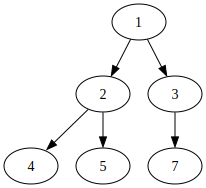

In [5]:
plot_tree(tree1)

In [6]:
%%time
solution = Solution()
tree1 = solution.connect(tree1)

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 11.9 µs


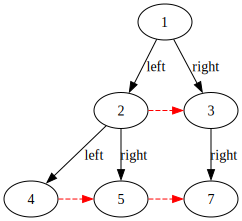

In [7]:
plot_tree_with_next(tree1)